In [215]:
import numpy as np
from matplotlib import pyplot as plt

    
def getDividedDiff(x, f_x):
    n = x.shape[0]
    dividedDiff = np.zeros(shape=(n, n))
    dividedDiff[:,0] = f_x
    
    for j in range(1, n):
        for i in range(n - j):
            dividedDiff[i][j] = (dividedDiff[i + 1][j - 1] - dividedDiff[i][j - 1]) / (x[i + j] - x[i])
            
    return dividedDiff

def getNewtonPolynom(x, f_x, need_calc):
    dividedDiff = getDividedDiff(x, f_x)[0, :]

    n = x.shape[0]
    result = dividedDiff[n - 1]
    for k in range(1, n):
        result = dividedDiff[n - k - 1] + (need_calc - x[n - k - 1]) * result

    result_derivative = 0

    acc_mul = 1
    curr_derivative = 0
    for k in range(n - 1):
        curr_derivative = curr_derivative * (need_calc - x[k]) + acc_mul
        acc_mul *= (need_calc - x[k])
        result_derivative += curr_derivative * dividedDiff[k + 1]

    return result, result_derivative

def getNewtonPolynomFunc(x, func, need_calc):
    f_x = func(x)
    return getNewtonPolynom(x, f_x, need_calc)


def plot(x, func, derivative, need_calc):
    result, result_derivative = getNewtonPolynomFunc(x, func, need_calc)
    fig, axs = plt.subplots(2, 1, figsize=(10, 10))

    axs[0].set_title("function")
    axs[0].plot(need_calc, func(need_calc), label="original function", color="blue")
    axs[0].plot(need_calc, result, label="Newton's polynom", color="red")
    axs[0].scatter(x, func(x), label="original function", color="orange")

    axs[1].set_title("derivative")
    axs[1].plot(need_calc, derivative(need_calc), label="original function", color="blue")
    axs[1].plot(need_calc, result_derivative, label="Newton's polynom", color="red")

    plt.legend()
    plt.show()





 Равномерная сетка, интерполяция синуса

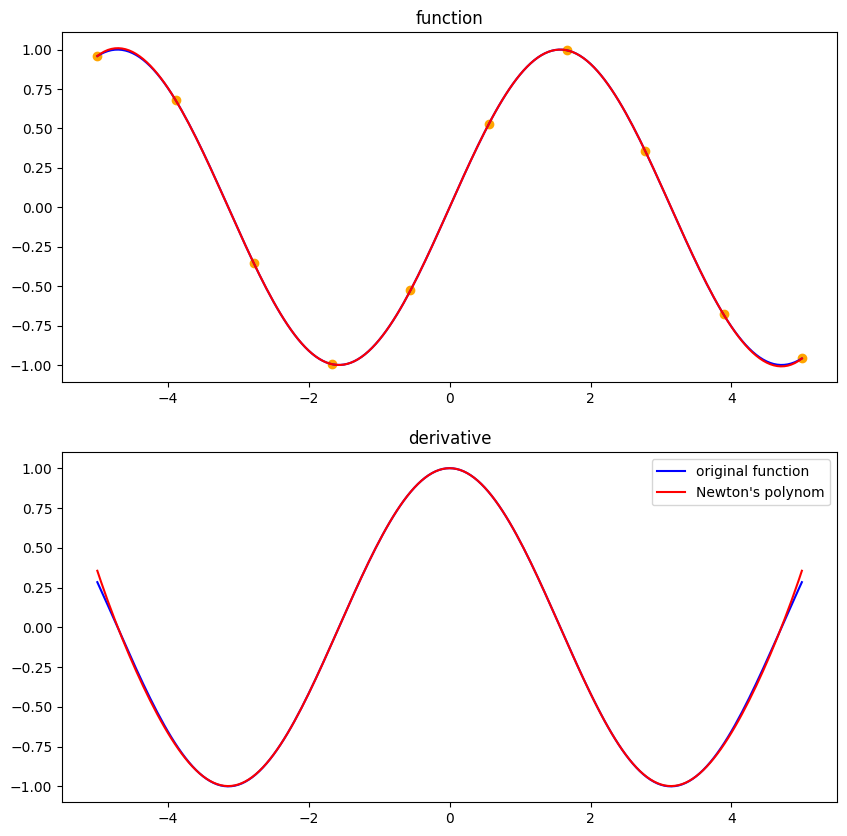

In [216]:
x = np.linspace(-5, 5, 10)
need_calc = np.linspace(-5, 5, 201)

plot(x, np.sin, np.cos, need_calc)


Равномерная сетка, интерполяция $\frac{1}{1+25x^2}$

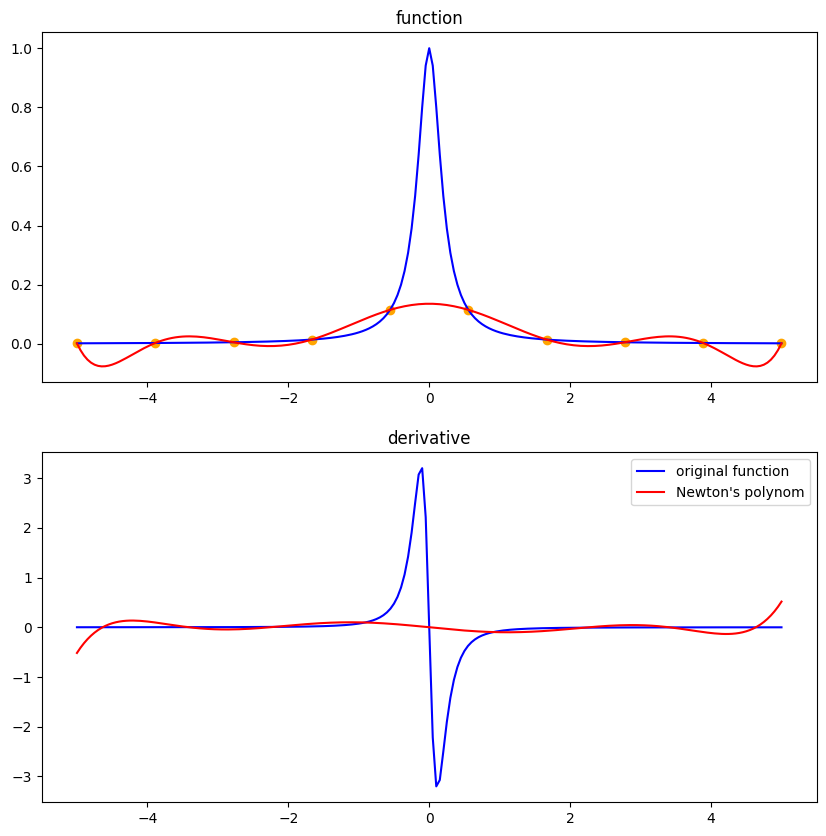

In [217]:
func = lambda x: 1 / (1 + 25 * x * x)
derivative = lambda x: -50 * x / (1 + 25 * x * x) ** 2

plot(x, func, derivative, need_calc)

Увеличим число узлов:

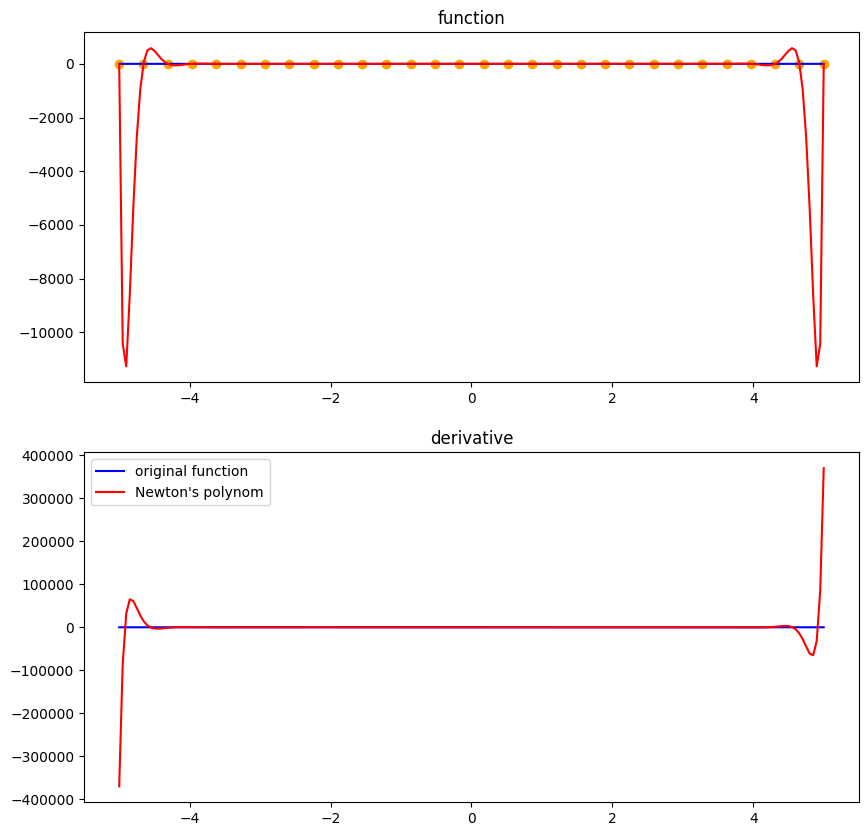

In [218]:
x = np.linspace(-5, 5, 30)
plot(x, func, derivative, need_calc)

Чебышевская сетка, синус

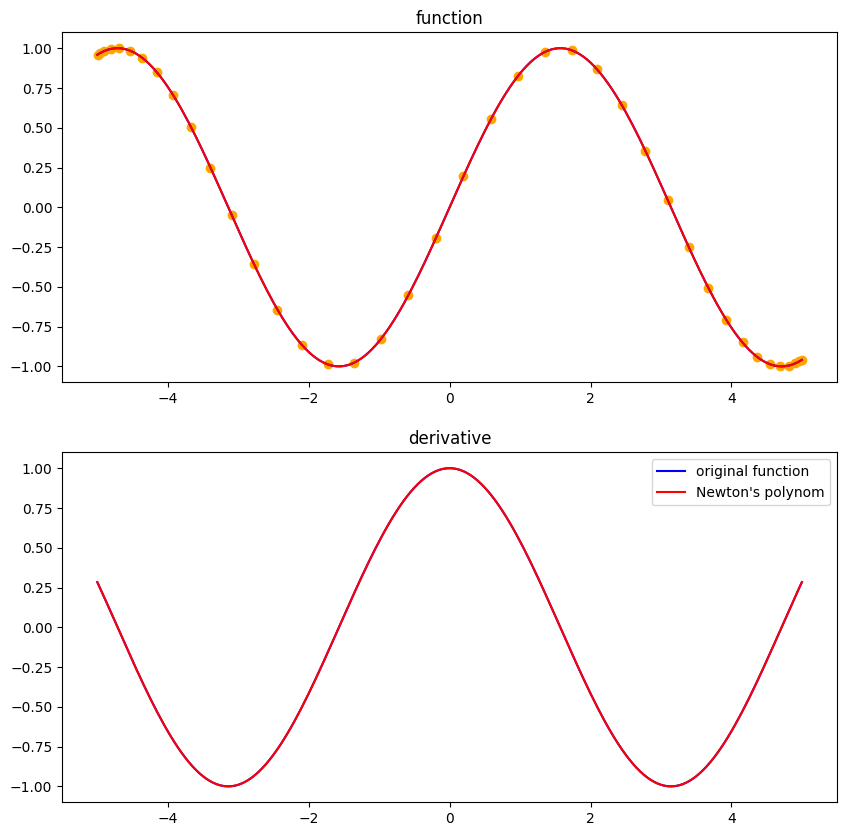

In [219]:
def chebyshevGrid(a, b, n):
    x = np.cos((2*np.arange(1, n + 1) - 1) * np.pi / (2 * n))
    x = 0.5 * (b - a) * x + 0.5 * (b + a)
    return x

x = chebyshevGrid(-5, 5, 40)

plot(x, np.sin, np.cos, need_calc)

Чебышевская сетка, интерполяция $\frac{1}{1+25x^2}$

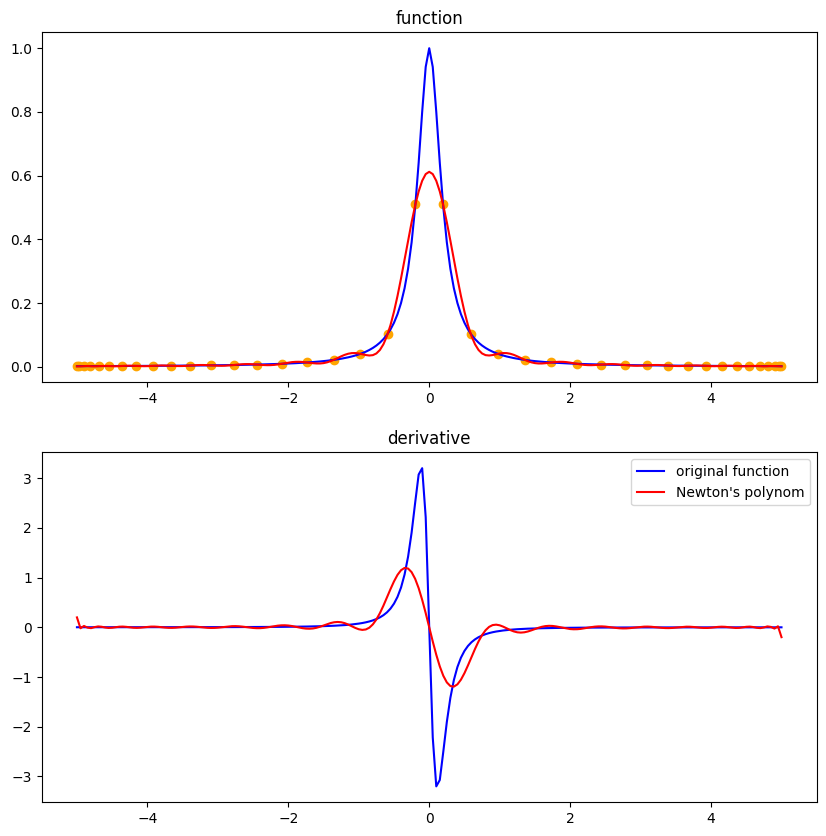

In [220]:
plot(x, func, derivative, need_calc)